# 2장 시작하기 전에: 신경망의 수학적 구성 요소

## 2-1 신경망과의 첫 만남

In [10]:
from keras.datasets import mnist
(train_images , train_labels) , (test_images , test_labels) = mnist.load_data()

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [13]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

In [16]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [17]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512 , activation='relu' , input_shape = (28 * 28,)))
network.add(layers.Dense(10 , activation='softmax'))

In [18]:
network.compile(optimizer = 'rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [19]:
train_images = train_images.reshape((60000 , 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000 , 28*28))
test_images = test_images.astype('float32') / 255

In [20]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [21]:
network.fit(train_images , train_labels , epochs=5 , batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 15ms/step - loss: 0.2582 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 8s 16ms/step - loss: 0.1048 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0692 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0497 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0373 - accuracy: 0.9885


In [22]:
test_loss , test_acc = network.evaluate(test_images , test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.0704 - accuracy: 0.9795


In [23]:
print('test_acc:' , test_acc)

test_acc: 0.9794999957084656


## 2-2 신경망을 위한 데이터 표현

###2-2-1 스칼라(0D 텐서)

In [24]:
import numpy as np
x = np.array(12)

In [25]:
x

array(12)

In [26]:
x.ndim

0

### 2-2-2 벡터(1D 텐서)

In [27]:
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [28]:
x.ndim

1

### 2-2-3 행렬(2D 텐서)

### 2-2-4 3D텐서와 고차원 텐서

### 2-2-5 핵심 속성

In [29]:
from keras.datasets import mnist
(train_images , train_labels) , (test_images, test_labels) = mnist.load_data()

In [30]:
print(train_images.ndim)

3


In [31]:
print(train_images.shape)

(60000, 28, 28)


In [32]:
print(train_images.dtype)

uint8


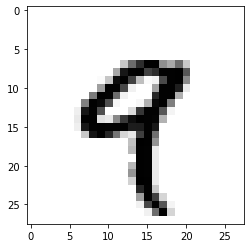

In [33]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 2-2-6 넘파이로 텐서 조작하기

In [34]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [35]:
my_slice = train_images[10:100 , : , :]
my_slice.shape

(90, 28, 28)

In [36]:
my_slice = train_images[10:100 , 0:28 , 0:28]
my_slice.shape

(90, 28, 28)

In [37]:
my_slice = train_images[: , 14:, 14:]

In [38]:
myslice = train_images[: , 7:-7  ,7:-7]

### 배치 데이터

In [ ]:
batch_1 = train_images[:128]
batch_2 = train_images[128:256]
n = int(input())
batch_n = train_images[128*n : 128*(n+1)]

### 2-2-8 텐서의 실제 사례

### 2-2-9 벡터 데이터

### 2-2-10 시계열 데이터 또는 시퀀스 데이터

### 2-2-11 이미지 데이터

### 2-2-12 비디오 데이터

## 2-3 신경망의 톱니바퀴: 텐서 연산

In [ ]:
def native_relu(x):
    assert len(x.shape) == 2

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i , j] = max(x[i,j] , 0)
    return x

In [ ]:
def native_add(x,y):
    assert len(x.shape) == 2
    assert x.shape == y.input_shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i , j] += y[i , j]
    
    return x

### 2-3-2 브로드 캐스팅

In [ ]:
def native_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2 
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.sahpe[1]):
            x[i , j] += y [j]
    return x

In [ ]:
import numpy as np

x = np.random.random((64 , 3 , 32 ,10))
y = np.random.random((32,10))

z = np.maximum(x,y)

In [ ]:
z.shape

### 2-3-3 텐서 점곱

In [ ]:
def natve_vector_dot(x,y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shaep[0]

    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
import numpy as np
def native_matrix_vector_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]

    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i,j] * y[j]
    return z

In [ ]:
def native_matrix_vector_dot(x,y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i,:] , y)
    return z

In [ ]:
def naive_matrix_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]

    z= np.zeros((x.shape[0] , y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[: , j]
            z[i,j] = naive_vector_dot(row_x , column_y)
    return z

### 2-3-4 텐서 크기 변환


In [ ]:
train_images = train_images.reshape((60000 , 28 * 28))

In [ ]:
x = np.zeros((300 , 20))
x = np.transpose(x)

In [ ]:
print(x.shape)

### 2-3-5 텐서 연산의 기하학적 해석

### 2-3-6 딥러닝의 기하학적 해석

## 2-4 신경망의 엔진: 그래디언트 기반 최적화

### 2-4-1 변화율이란?

### 2-4-2 텐서 연산의 변화율: 그래디언트

### 2-4-3 확률적 경사 하강법

### 2-4-4 변화율 연결: 역전파 알고리즘

## 2-5 첫 번째 예제 다시 살펴보기

In [ ]:
from keras.datasets import mnist
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000 , 28 * 28))
train_images = train_images.astype('float32') / 255

In [ ]:
test_images = test_images.reshape((10000 , 28*28))
test_images = test_images.astype('float32') / 255

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512 , activation='relu' , input_shape = (28*28,)))
network.add(layers.Dense(10 , activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images , train_labels , epochs=5 , batch_size =128)